#Load Data

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
 
book = pd.read_csv("/content/drive/MyDrive/dataset/book/Books.csv")
rating = pd.read_csv("/content/drive/MyDrive/dataset/book/Ratings.csv")
user = pd.read_csv("/content/drive/MyDrive/dataset/book/Users.csv")
 
print('Jumlah buku: ', len(book.ISBN.unique()))
print('Jumlah rating: ', len(rating.ISBN.unique()))
print('Jumlah user: ', len(user))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Jumlah buku:  271360
Jumlah rating:  340556
Jumlah user:  278858


#Data Understanding

##Univariate Exploratory Data Analysis

###Data buku

In [53]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [54]:
print('Jumlah Judul Buku: ', len(book['Book-Title'].unique()))
print('Judul Buku: ', book['Book-Title'].unique())

Jumlah Judul Buku:  242135
Judul Buku:  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


###Data Rating

In [55]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [56]:
rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [57]:
print('Jumlah ID user: ', len(rating['User-ID'].unique()))
print('Jumlah ISBN: ', len(rating['ISBN'].unique()))
print('Jumlah data penilaian buku: ', len(rating['Book-Rating']))

Jumlah ID user:  105283
Jumlah ISBN:  340556
Jumlah data penilaian buku:  1149780


###Data User

In [58]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [59]:
print('Jumlah user: ', len(user))

Jumlah user:  278858


#Data Preparation

##Menangani missing value

###Data Buku

In [60]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [61]:
book = book.dropna()
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [62]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

###Data rating

In [63]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

###Data User

In [64]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [65]:
user = user.dropna()
user

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [66]:
user.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

##Menggabungkan data

In [67]:
all_book = pd.merge(rating, book[['ISBN','Book-Title','Book-Author']], on='ISBN', how='left')
all_book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli


In [68]:
all_book.isnull().sum()

User-ID             0
ISBN                0
Book-Rating         0
Book-Title     118651
Book-Author    118651
dtype: int64

In [69]:
all_book = all_book.dropna()
all_book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter


##Drop duplikat values

In [70]:
all_book = all_book.drop_duplicates('ISBN')
all_book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149701,276688,0517145553,0,Mostly Harmless,Douglas Adams
1149747,276688,1575660792,7,Gray Matter,Shirley Kennett
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman


##Mengetahui jumlah rating

In [71]:
all_book.groupby('User-ID').sum()

,Book-Rating
User-ID,
2,0
8,39
9,0
10,0
12,10
...,...
278846,8
278849,0
278851,91


##Konversi data menjadi list

In [72]:
book_id = all_book['ISBN'].tolist()

book_title = all_book['Book-Title'].tolist()

book_author = all_book['Book-Author'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_author))

270145
270145
270145


##Membuat dictionary untuk menentukan pasangan key-value pada data

In [73]:
all_book_new = pd.DataFrame({
    'book_id': book_id,
    'book_title': book_title,
    'book_author': book_author
})
all_book_new

,book_id,book_title,book_author
0,034545104X,Flesh Tones: A Novel,M. J. Rose
1,0155061224,Rites of Passage,Judith Rae
2,0446520802,The Notebook,Nicholas Sparks
3,052165615X,Help!: Level 1,Philip Prowse
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...
270140,0517145553,Mostly Harmless,Douglas Adams
270141,1575660792,Gray Matter,Shirley Kennett
270142,0590907301,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey
270143,0679752714,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman


##Mengurangi jumlah data
karena data terlalu banyak menyebabkan resource yang dibutuhkan melebihi kapasitas yang disediakan secara gratis oleh google colab sebagai platform melatih model machine learning ini maka data harus dikurangi menjadi 10000 data saja

In [74]:
all_book_new = all_book_new[:10000]
all_book_new

,book_id,book_title,book_author
0,034545104X,Flesh Tones: A Novel,M. J. Rose
1,0155061224,Rites of Passage,Judith Rae
2,0446520802,The Notebook,Nicholas Sparks
3,052165615X,Help!: Level 1,Philip Prowse
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...
9995,0312964854,Hush Little Babies : The True Story Of A Mothe...,Donald A. Davis
9996,0312982194,Gettin' Merry,Beverly Jenkins
9997,0345410998,Street Boys,Lorenzo Carcaterra
9998,0374517886,The Collected Stories of Isaac Bashevis Singer,Isaac Bashevis Singer


In [75]:
rating = rating[:10000]
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
9995,243,0425164403,0
9996,243,0440224764,0
9997,243,0440225701,0
9998,243,0440226430,0


#Modelling

##Content Based Filtering

In [76]:
data = all_book_new
data.sample(5)

,book_id,book_title,book_author
2768,0440221048,A Certain Justice: A Novel,John T. Lescroart
4706,0373256086,"Star (Harlequin Temptation, No 508)",Janice Kaiser
7335,1869893417,"Codex Dark Eldar (Warhammer 40,000 Codex)",J. Johnson
4570,0373195486,"Working Overtime (Silhouette Romance, No. 1548)",Raye Morgan
9706,2070513726,Le Bon Gros GÃ?Â©ant,Roald Dahl


##TF-IDF Vectorizer

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(data['book_title']) 

tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '007',
 '01',
 '02',
 '04',
 '05921',
 '062',
 '063',
 '068',
 '073',
 '08',
 '10',
 '100',
 '1000',
 '1001',
 '1002',
 '1005',
 '101',
 '1012',
 '1013',
 '1015',
 '1016',
 '1017',
 '1019',
 '102',
 '1024',
 '1025',
 '1029',
 '1031',
 '1037',
 '1039',
 '104',
 '1040',
 '1042',
 '1046',
 '1049',
 '105',
 '1052',
 '1055',
 '1056',
 '1057',
 '1059',
 '1060',
 '1061',
 '1062',
 '1063',
 '1066',
 '1070',
 '1071',
 '1075',
 '108',
 '1082',
 '109',
 '11',
 '1101',
 '1104',
 '1108',
 '111',
 '1113',
 '1115',
 '1138',
 '1139',
 '114',
 '1141',
 '1144',
 '11447',
 '1145',
 '11471',
 '11473',
 '11483',
 '11484',
 '11485',
 '11486',
 '115',
 '11519',
 '11523',
 '11543',
 '11564',
 '116',
 '1161',
 '11619',
 '1165',
 '11664',
 '11714',
 '11715',
 '1173',
 '1175',
 '1177',
 '118',
 '1185',
 '1196',
 '1197',
 '11th',
 '12',
 '1203',
 '1207',
 '1211',
 '1218362',
 '1218404',
 '1218437',
 '1218448',
 '122',
 '1223',
 '1225',
 '1227',
 '1229',
 '1238',
 '1244',
 '125',
 '1250',
 '1257',


In [78]:
tfidf_matrix = tf.fit_transform(data['book_title']) 
 
tfidf_matrix.shape 

(10000, 11371)

In [79]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.book_author
).sample(22, axis=1).sample(10, axis=0)

,horton,discourse,bush,catfish,matilda,chess,terrified,shout,goals,advertising,...,aids,prize,nurse,3147,961,instruã,geschenk,nicolson,steamy,anfã
book_author,,,,,,,,,,,,,,,,,,,,,
PHILIP PULLMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jean-Jacques Rousseau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Neil Gaiman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chris Crutcher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Elizabeth George,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beatrix Potter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael Cunningham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lilian Jackson Braun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nora Roberts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Cosine Similarity

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03333739,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.02542833,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03333739, 0.02542833, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [82]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_author'], columns=data['book_author'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


book_author,Lionel Saben,Sheila Simonson,Jennifer Lauck,PHILIP PULLMAN,R. L. Stine
book_author,,,,,
Paul Berman,0.0,0.0,0.000000,0.000000,0.000000
Betty Cuthbert,0.0,0.0,0.000000,0.123641,0.000000
Joel Rosenberg,0.0,0.0,0.000000,0.028249,0.051958
Mario Benedetti,0.0,0.0,0.000000,0.000000,0.000000
Dean R. Koontz,0.0,0.0,0.000000,0.025695,0.047260
Barbara Bretton,0.0,0.0,0.000000,0.000000,0.042102
MARK TWAIN,0.0,0.0,0.000000,0.011544,0.021233
John Grisham,0.0,0.0,0.000000,0.031799,0.058487
Michael MacDonald,0.0,0.0,0.000000,0.000000,0.000000


###Mendapatkan Rekomendasi

In [83]:
def book_recommendations(author, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):

    index = similarity_data.loc[:,author].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(author, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [84]:
data[data.book_author.eq('Jill McCorkle')]

,book_id,book_title,book_author
2520,0945575750,Crash Diet,Jill McCorkle


In [85]:
book_recommendations('Jill McCorkle')

,book_author,book_title
0,Sonja L. Conner,NEW AMERICAN DIET
1,"Martin, Ph.D. Katahn",The T-Factor Diet
2,C. Wayne Callaway,The Callaway Diet
3,"Sally &amp; Proctor, William Langendoen",The Preconception Gender Diet
4,ROBERT C. ATKINS,Dr. Atkin's Diet Revolution


##Collaborative Filtering

###Data Understanding

In [86]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [87]:
df = rating
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
9995,243,0425164403,0
9996,243,0440224764,0
9997,243,0440225701,0
9998,243,0440226430,0


###Data Preparation

####Encode

In [88]:
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

In [89]:
ISBN_ids = df['ISBN'].unique().tolist()

ISBN_to_ISBN_encoded = {x: i for i, x in enumerate(ISBN_ids)}
 
ISBN_encoded_to_ISBN = {i: x for i, x in enumerate(ISBN_ids)}

####Mapping kedalam dataframe

In [90]:
df['user'] = df['User-ID'].map(user_to_user_encoded)
 
df['ISBN'] = df['ISBN'].map(ISBN_to_ISBN_encoded)

In [91]:
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_ISBN = len(ISBN_encoded_to_ISBN)
print(num_ISBN)
 
# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book-Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_ISBN, min_rating, max_rating
))

941
9340
Number of User: 941, Number of ISBN: 9340, Min Rating: 0.0, Max Rating: 10.0


####Membagi Data untuk Training dan Validasi

In [92]:
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user
6252,278418,5902,0.0,678
4684,278418,4379,0.0,678
1731,277427,1686,0.0,255
4742,278418,4436,0.0,678
4521,278418,4218,0.0,678
...,...,...,...,...
5734,278418,5401,0.0,678
5191,278418,4870,0.0,678
5390,278418,5066,0.0,678
860,277087,850,5.0,139


In [93]:
x = df[['user', 'ISBN']].values
 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 678 5902]
 [ 678 4379]
 [ 255 1686]
 ...
 [ 678 5066]
 [ 139  850]
 [ 678 6857]] [0.  0.  0.  ... 0.  0.5 0. ]


###Proses Training

In [94]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_ISBN, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_ISBN = num_ISBN
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.ISBN_embedding = layers.Embedding(
        num_ISBN,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.ISBN_bias = layers.Embedding(num_ISBN, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    ISBN_vector = self.ISBN_embedding(inputs[:, 1])
    ISBN_bias = self.ISBN_bias(inputs[:, 1])
 
    dot_user_ISBN = tf.tensordot(user_vector, ISBN_vector, 2) 
 
    x = dot_user_ISBN + user_bias + ISBN_bias
    
    return tf.nn.sigmoid(x)

In [95]:
model = RecommenderNet(num_users, num_ISBN, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [96]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 [==============================] - 9s 9ms/step - loss: 0.6029 - root_mean_squared_error: 0.4054 - val_loss: 0.5304 - val_root_mean_squared_error: 0.3634
Epoch 2/100
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4205 - root_mean_squared_error: 0.3040 - val_loss: 0.4834 - val_root_mean_squared_error: 0.3362
Epoch 3/100
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3957 - root_mean_squared_error: 0.2904 - val_loss: 0.4437 - val_root_mean_squared_error: 0.3157
Epoch 4/100
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3691 - root_mean_squared_error: 0.2751 - val_loss: 0.4152 - val_root_mean_squared_error: 0.3030
Epoch 5/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3496 - root_mean_squared_error: 0.2631 - val_loss: 0.3965 - val_root_mean_squared_error: 0.2955
Epoch 6/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3331 - root_mean_squared_error: 0.2520 - val

###Visualisasi Metrik

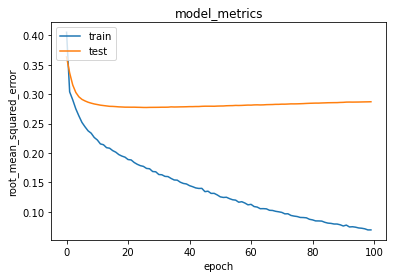

In [97]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Mendapatkan Rekomendasi

In [98]:
book_df = all_book_new
df = pd.read_csv('/content/drive/MyDrive/dataset/book/Ratings.csv')
df = df[:10000]

user_id = df['User-ID'].sample(1).iloc[0]
book_visited_by_user = df[df['User-ID'] == user_id]

book_not_visited = book_df[~book_df['book_id'].isin(book_visited_by_user.ISBN.values)]['book_id'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(ISBN_to_ISBN_encoded.keys()))
)
 
book_not_visited = [[ISBN_to_ISBN_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [99]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    ISBN_encoded_to_ISBN.get(book_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['book_id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_author, ':', row.book_title)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['book_id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_author, ':', row.book_title)

252/252 [==============================] - 0s 1ms/step
Showing recommendations for users: 277087
Book with high ratings from user
--------------------------------
Leon Tolstoi : Guerra y Paz
--------------------------------
Top 10 book recommendation
--------------------------------
CHRISTOPHER PAUL CURTIS : The Watsons Go to Birmingham - 1963 (Yearling Newbery)
Harper Lee : To Kill a Mockingbird
Ruth Reichl : Tender at the Bone: Growing Up at the Table
Willa Cather : My Antonia (Dover Thrift Editions)
Witi Ihimaera : The Whale Rider
Bernard Goldberg : Bias: A CBS Insider Exposes How the Media Distort the News
Maeve Binchy : This Year It Will Be Different: And Other Stories
Keith Laumer : ROGUE BOLO
Jeffrey, A. Carver : Dragon Rigger
Robert C. Atkins : Dr. Atkins' New Carbohydrate Gram Counter
